In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

In [12]:

image = cv2.imread('Lanes.jpg')

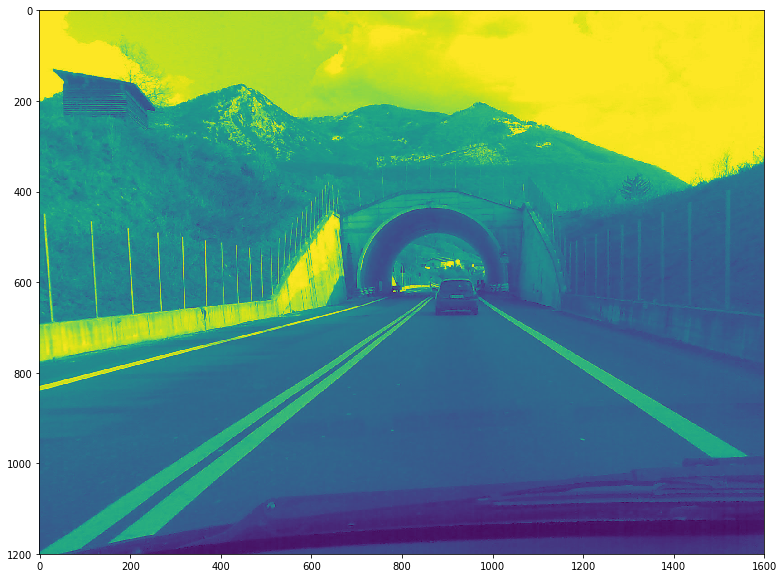

In [13]:
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

# Reduce noise in the image
Using gaussian filter to smoothen the image

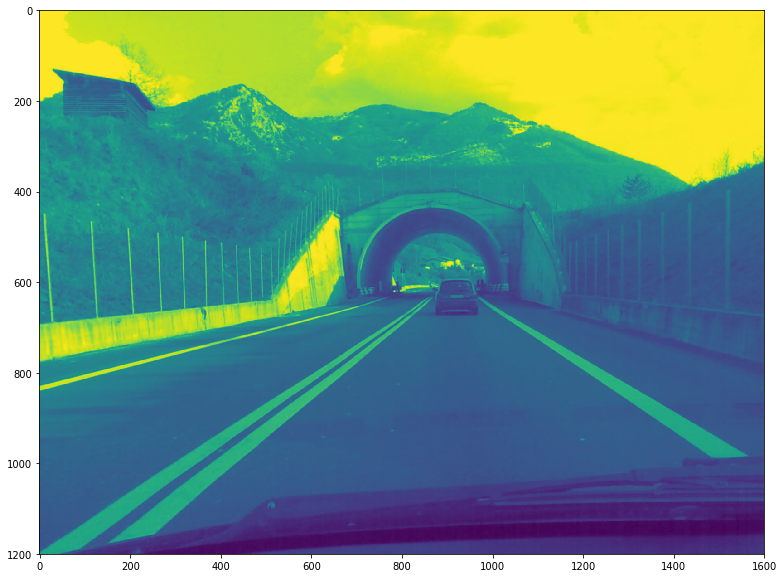

In [14]:
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blur)

# Apply canny method for edge detection

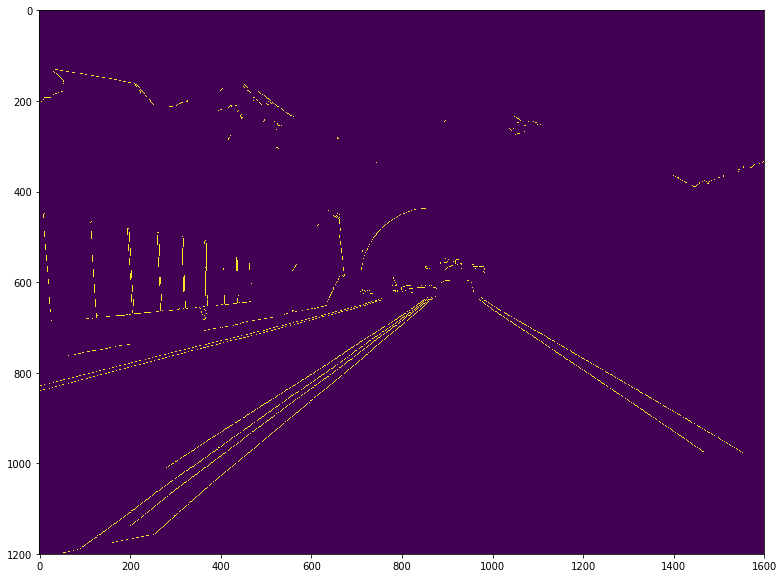

In [15]:
# make sure to keep the ratio of high threshold to low threshold (2nd n 3rd arguments)

canny = cv2.Canny(blur,200,300)
plt.imshow(canny)

# Define the region of interest which is defined by a triangle


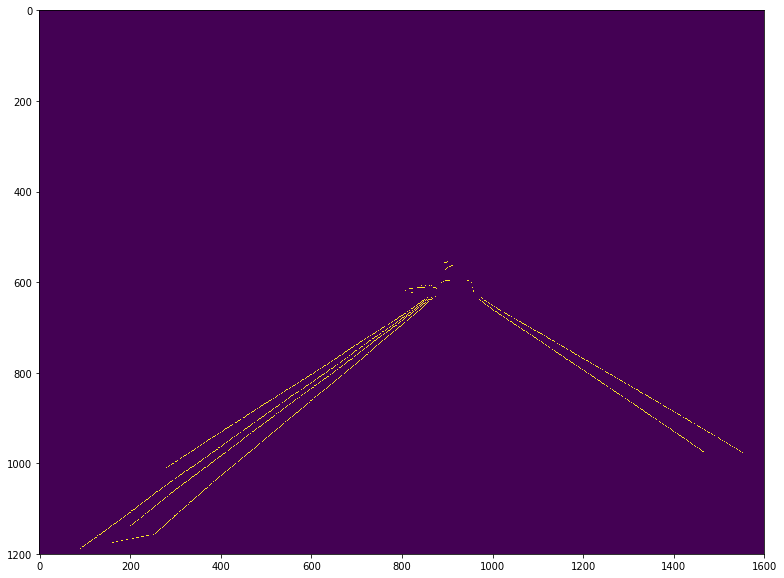

In [16]:
height = canny.shape[0]
polygons = np.array([[(0,height),(1600,1000),(900,550)]])
mask = np.zeros_like(canny)
cv2.fillPoly(mask,polygons,255)
cropped_image = cv2.bitwise_and(canny,mask)
plt.imshow(cropped_image)

# Detect straight lines in the image using Hough Transforms

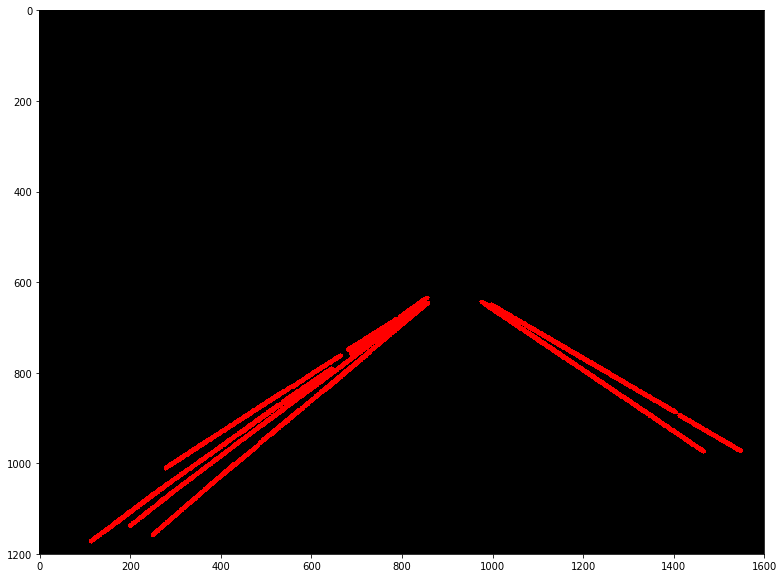

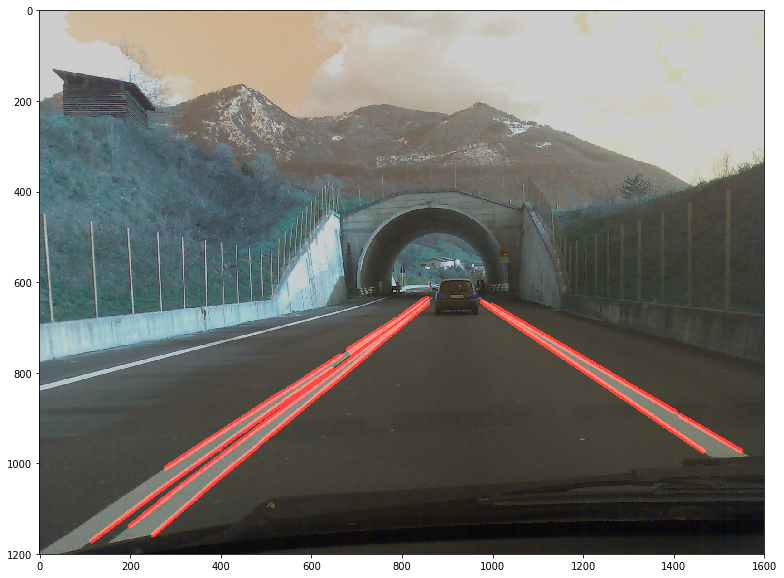

In [17]:
lines = cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=8)

line_image= np.zeros_like(lane_image)
if lines is not None:
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        
plt.imshow(line_image)
plt.show()

blendedImage = cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(blendedImage)
plt.show()